# A very intro guide to COS Data

## Start by downloading some data
* FUV
  * Proposal 15366
  * *Andy might recognize this proposal as his COS LP4 Spectral Resolution Program!*
* NUV
  * Picked at random

In [ ]:
# Import the necessary libraries
from astroquery.mast import Observations # For actually searching and downloading
from pathlib import Path # Handling system paths
# For reading and editing fits astropy table format files
from astropy.table import Table
# For reading and editing general fits files
from astropy.io import fits
# For dealing with units and unit conversions
from astropy import units as u
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

### We begin by downloading the final spectrum product (`X1DSUM`) of an FUV observation.

In [ ]:
# Download an example FUV dataset using astroquery:
## Find all the observations from a single HST Proposal
obs_from_proposal = Observations.query_criteria(
    proposal_id="15366" # The Proposal ID of the observations to download
)
## Find all the data products for these observations
products_from_proposal = Observations.get_product_list(
    obs_from_proposal
)
print(f"Found {len(products_from_proposal)} total data products")
## Filter to a specific subset, i.e. of filetypes
products_to_download = Observations.filter_products(
    products_from_proposal,
    productSubGroupDescription=["X1DSUM","ASN"] # Filters to only the X1DSUM and ASN files
)
# Download the FUV products
download_table = Observations.download_products(products_to_download)
# Make a list of the local paths, aggregated by type of file
fuv_x1dsum_products = [Path(local_path) for local_path in download_table["Local Path"] if "x1dsum" in local_path]
fuv_asn_products = [Path(local_path) for local_path in download_table["Local Path"] if "asn" in local_path]
print("FUV X1DSUM Files: \n", fuv_x1dsum_products, "\nFUV ASN Files: \n", fuv_asn_products)

### We also want to download an example of the raw data (`RAWTAG`), and the intermediate data step (`CORRTAG`)
This is not all the data which went into the final products downloaded above.
It corresponds to a single exposure on a single segment of the FUV detector.

In [ ]:
rawtag_a = Path(Observations.download_products(
    Observations.filter_products(
        Observations.get_product_list(
            Observations.query_criteria(
                proposal_id="15366"
            )
        ),
        productSubGroupDescription=["RAWTAG_A"]
    )[0]
)["Local Path"][0])

corrtag_a = Path(Observations.download_products(
    Observations.filter_products(
        Observations.get_product_list(
            Observations.query_criteria(
                proposal_id="15366"
            )
        ),
        productSubGroupDescription=["CORRTAG_A"]
    )[0]
)["Local Path"][0])

print(f"\n\nRaw TIME-TAG data from segment A in: {rawtag_a}")
print(f"Corrected TIME-TAG data from segment A in: {corrtag_a}")

### Finally, let's download an example NUV dataset using astroquery in a more condensed form

In [ ]:
nuv_x1dsum = Path(Observations.download_products(
    Observations.filter_products(
        Observations.get_product_list(
            Observations.query_criteria(
                obs_id = 'lbbd01020'
            )
        ),
        productSubGroupDescription=["X1DSUM"]
    )[0]
)["Local Path"][0])

## Examining the data products

### The RAW and CORR Data:

In [61]:
hdr0 = fits.getheader(rawtag_a)
hdr1 = fits.getheader(rawtag_a, ext=1)
print(f"This is a {hdr1['EXPTIME']} second exposure on segment {hdr0['SEGMENT']} with the {hdr0['OPT_ELEM']} grating and the {hdr0['CENTRWV']} Å central wavelength setting.")

# My favorite way to read in FITS data - there are others!
raw_data = Table.read(rawtag_a, hdu=1)
corr_data = Table.read(corrtag_a, hdu=1)

This is a 403.0 second exposure on segment FUVA with the G130M grating and the 1222.0 Å central wavelength setting.


### Let's take a look at how the counts fell on the detector.

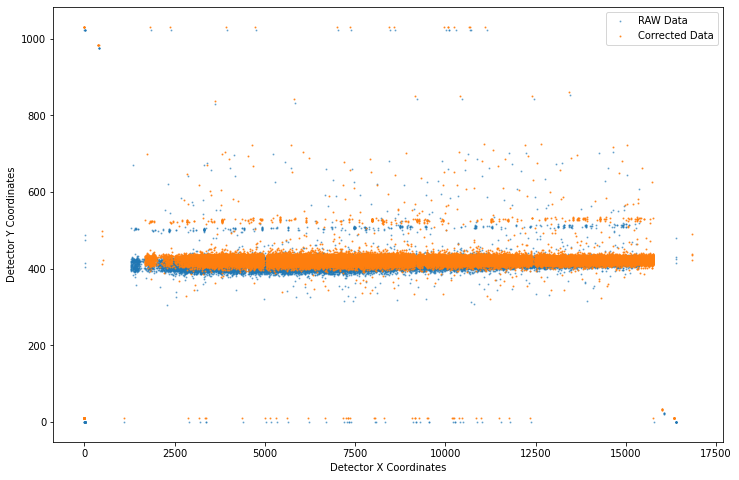

In [62]:
# So this runs quickly, limit to first 50k counts

plt.figure(figsize=(12,8))
plt.scatter(raw_data["RAWX"][:50000], raw_data["RAWY"][:50000], s=1, alpha=0.5, label="RAW Data")
plt.scatter(corr_data["XFULL"][:50000], corr_data["YFULL"][:50000], s=1, alpha=0.8, label="Corrected Data")
plt.xlabel("Detector X Coordinates")
plt.ylabel("Detector Y Coordinates")
plt.legend()
plt.show()